In [4]:
import xarray
import hvplot.xarray
import xarray
import numpy as np

import hvplot.xarray

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoviews as gv

import matplotlib.pyplot as plt
%matplotlib inline
import cmocean.cm as cmo
import os
home_top_dir=os.environ["HOME"]



In [5]:
a=np.zeros([40,80,16,10])
b=np.zeros([40,80,16,10])
diff_temp=np.zeros([40,80,16,10])
ds_roms = xarray.open_dataset(home_top_dir+"/seahorce-scidac/COAWST/roms_his.nc", chunks={"ocean_time": 100})
ds = xarray.open_dataset(home_top_dir+"/seahorce-scidac/ROMSX/Exec/Upwelling/plt_his.nc", chunks={"ocean_time": 100})
for k in np.arange(-1,15):
    for j in np.arange(0,8):
        for i in np.arange(0,4):
            for n in np.arange(0,10):
                a[i,j,k,n]=(ds.temp.isel(xi_rho=slice(i,i+1), eta_rho=slice(j,j+1),s_rho=slice(1+k,2+k),ocean_time=n)).as_numpy()
                b[i,j,k,n]=(ds_roms.temp.isel(xi_rho=slice(i,i+1), eta_rho=slice(j,j+1),s_rho=slice(1+k,2+k), ocean_time=n)).as_numpy()
                diff_temp[i,j,k,n]=a[i,j,k,n]-b[i,j,k,n]
print(np.sum(diff_temp))

/home/jmsexton/yt-conda/envs/seahorce/lib/python3.10/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jmsexton/yt-conda/envs/seahorce/lib/python3.10/site-packages/xarray/core/indexing.py:535: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


IndexError: Index 4 is out of bounds for axis 0 with size 4

In [ ]:
#sanity check we're evolving something
print(np.sum(a[:,:,:,9]-a[:,:,:,0]))

In [10]:
a=np.zeros([41,80,16])
b=np.zeros([41,80,16])
diff_temp=np.zeros([41,80,16])
ds_roms = xarray.open_dataset(home_top_dir+"/seahorce-scidac/COAWST/roms_his.nc", chunks={"ocean_time": 100})
ds = xarray.open_dataset(home_top_dir+"/seahorce-scidac/ROMSX/Exec/Upwelling/plt_his.nc", chunks={"ocean_time": 100})
for k in np.arange(0,14):
    for j in np.arange(0,1):
        for i in np.arange(0,1):
            a[i,j,k]=(ds.x_velocity.isel(xi_rho=slice(i,i+1), eta_rho=slice(j,j+1),s_rho=slice(k,1+k),ocean_time=3)).as_numpy()
            b[i,j,k]=(ds_roms.u.isel(xi_u=slice(i+1,i+2), eta_u=slice(j+1,j+2),s_rho=slice(k,1+k), ocean_time=3)).as_numpy()
            print(b[i,j,k])
            print((ds_roms.u.isel(xi_u=slice(i+1,i+2), eta_u=slice(j+1,j+2),s_rho=slice(k,1+k), ocean_time=3)).as_numpy())
            diff_temp[i,j,k]=a[i,j,k]-b[i,j,k]
print(np.sum(diff_temp))

/home/jmsexton/yt-conda/envs/seahorce/lib/python3.10/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jmsexton/yt-conda/envs/seahorce/lib/python3.10/site-packages/xarray/core/indexing.py:535: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


0.09835551679134369
<xarray.DataArray 'u' (s_rho: 1, eta_u: 1, xi_u: 1)>
array([[[0.09835552]]], dtype=float32)
Coordinates:
  * s_rho       (s_rho) float64 -0.9688
    x_u         (eta_u, xi_u) float64 1e+03
    y_u         (eta_u, xi_u) float64 500.0
    ocean_time  object 0001-01-01 00:15:00
Dimensions without coordinates: eta_u, xi_u
Attributes:
    long_name:  u-momentum component
    units:      meter second-1
    time:       ocean_time
    grid:       grid
    location:   edge1
    field:      u-velocity, scalar, series
0.09657345712184906
<xarray.DataArray 'u' (s_rho: 1, eta_u: 1, xi_u: 1)>
array([[[0.09657346]]], dtype=float32)
Coordinates:
  * s_rho       (s_rho) float64 -0.9062
    x_u         (eta_u, xi_u) float64 1e+03
    y_u         (eta_u, xi_u) float64 500.0
    ocean_time  object 0001-01-01 00:15:00
Dimensions without coordinates: eta_u, xi_u
Attributes:
    long_name:  u-momentum component
    units:      meter second-1
    time:       ocean_time
    grid:       grid

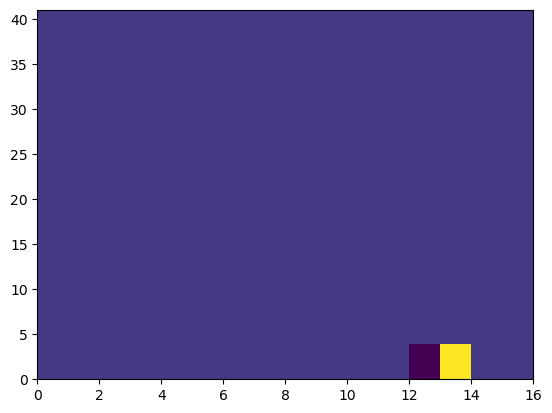

In [7]:
plt.pcolor(diff_temp[:,2,:])